In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau

# train

In [17]:
train_df=pd.read_csv('data/sign_mnist_train/sign_mnist_train.csv')
test_df =E:\sign_language_prediction pd.read_csv('data/sign_mnist_test/sign_mnist_test.csv')

D:\Anaconda\envs\computervision\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

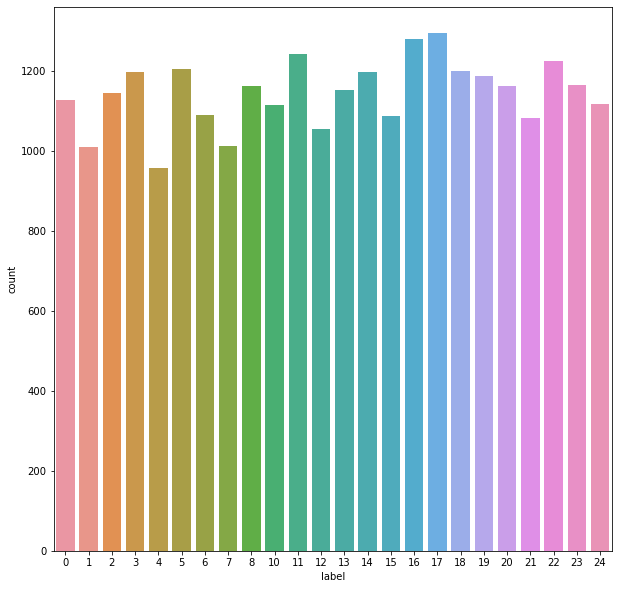

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(train_df['label'])

In [19]:
y_train = train_df['label']
y = test_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [5]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [6]:
x_train = train_df.values
x_test = test_df.values
x_train = (x_train/255)
x_train = x_train.reshape(-1,28,28,1)
x_test = (x_test/255)
x_test = x_test.reshape(-1,28,28,1)

In [7]:
datagen = ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)
datagen.fit(x_train)

In [8]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [9]:
model = Sequential()
model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(32,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(16,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(24,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4

In [10]:
Model = model.fit(datagen.flow(x_train,y_train,batch_size=128),epochs=20,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])

  ...
    to  
  ['...']
Train for 215 steps, validate on 7172 samples
Epoch 1/20
215/215 [==============================] - 38s 179ms/step - loss: 0.9858 - accuracy: 0.6887 - val_loss: 2.7313 - val_accuracy: 0.1016
Epoch 2/20
215/215 [==============================] - 22s 102ms/step - loss: 0.1888 - accuracy: 0.9371 - val_loss: 0.6578 - val_accuracy: 0.7758
Epoch 3/20
215/215 [==============================] - 23s 105ms/step - loss: 0.0960 - accuracy: 0.9680 - val_loss: 0.1059 - val_accuracy: 0.9681
Epoch 4/20
215/215 [==============================] - 26s 121ms/step - loss: 0.0623 - accuracy: 0.9790 - val_loss: 0.2484 - val_accuracy: 0.9149
Epoch 5/20
214/215 [============================>.] - ETA: 0s - loss: 0.0507 - accuracy: 0.9836
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 22s 103ms/step - loss: 0.0505 - accuracy: 0.9837 - val_loss: 0.6445 - val_accuracy: 0.8388
Epoch 6/20
215/215 [===================

In [11]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

array([ 6,  5, 10,  0,  3], dtype=int64)

In [20]:
cm = confusion_matrix(y,predictions)

In [22]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [16]:
model.save("model.h5")